In [1]:
# longitude limit = 359.94423568 > l > 179.94423568 degrees
# Galactic Center SgrA* (l,b)=(359.94423568,-0.04616002)

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

import astropy.coordinates as coord
import astropy.units as u
from PyAstronomy import pyasl
from astropy.coordinates import SkyCoord

In [2]:
# display table with cluster name, ra, and dec in seperate columns

tb1 = ascii.read("ediscs coords only.csv", header_start=0)
tb1

Cluster,RA,Dec
str11,str10,str9
1018.8-1211,10 18 46.8,-12 11 53
1059.2-1253,10 59 07.1,-12 53 15
1119.3-1129,11 19 16.7,-11 30 29
1202.7-1224,12 02 43.4,-12 24 30
1232.5-1250,12 32 30.5,-12 50 36
1238.5-1144,12 38 33.0,-11 44 30
1301.7-1139,13 01 40.1,-11 39 23
1353.0-1137,13 53 01.7,-11 37 28
1411.1-1148,14 11 04.6,-11 48 29


In [3]:
# initializes ra and dec columns to their own arrays
data = ascii.read("ediscs coords only.csv", header_start=0, data_start=1)
ra = data['RA']
dec = data['Dec']

In [4]:
# import and check a secondary table with a combined ra and dec column for easier use of pyastronomy

tb2 = ascii.read("ediscs coords topcat.csv",)
tb2

col1,col2
str11,str20
Cluster,RA and Dec
1018.8-1211,10 18 46.8 -12 11 53
1059.2-1253,10 59 07.1 -12 53 15
1119.3-1129,11 19 16.7 -11 30 29
1202.7-1224,12 02 43.4 -12 24 30
1232.5-1250,12 32 30.5 -12 50 36
1238.5-1144,12 38 33.0 -11 44 30
1301.7-1139,13 01 40.1 -11 39 23
1353.0-1137,13 53 01.7 -11 37 28


In [5]:
# check for header names and where the header starts on the table

tb2 = ascii.read("ediscs coords topcat.csv", header_start=1)
tb2.colnames

['Cluster', 'RA and Dec']

In [6]:
# initialize the column of ra and dec combined then converts them from sexagesimal to decimal degrees
data_combined = ascii.read("ediscs coords topcat.csv", header_start=1, data_start = 2)
ra_dec = data_combined['RA and Dec']

ra_dec_deg = []

for i in range(len(ra_dec)):
    ra_dec_deg.append(pyasl.coordsSexaToDeg(str(ra_dec[i])))

# check for if the conversion worked and if it read every set of coordinates
print(ra_dec_deg)

[(154.695, -12.198055555555555), (164.77958333333333, -12.8875), (169.81958333333333, -11.508055555555556), (180.68083333333334, -12.408333333333333), (188.12708333333333, -12.843333333333334), (189.6375, -11.741666666666665), (195.41708333333332, -11.65638888888889), (208.25708333333333, -11.624444444444444), (212.76916666666668, -11.808055555555557), (215.08333333333334, -12.608333333333333), (159.46333333333334, -12.724166666666667), (160.16833333333332, -11.934444444444445), (163.60208333333333, -11.772222222222224), (163.68166666666667, -12.764444444444445), (165.93083333333334, -12.759444444444444), (170.715, -11.608888888888888), (174.54291666666666, -11.560555555555556), (184.18791666666667, -12.021666666666668), (186.99541666666667, -11.586944444444445), (208.54041666666666, -12.516944444444444)]


In [7]:
# sliced the combined ra and deg to the ra individually
ra_deg = []

for i in range(len(ra_dec_deg)):
    ra_deg.append(ra_dec_deg[i][0])

print(ra_deg)

[154.695, 164.77958333333333, 169.81958333333333, 180.68083333333334, 188.12708333333333, 189.6375, 195.41708333333332, 208.25708333333333, 212.76916666666668, 215.08333333333334, 159.46333333333334, 160.16833333333332, 163.60208333333333, 163.68166666666667, 165.93083333333334, 170.715, 174.54291666666666, 184.18791666666667, 186.99541666666667, 208.54041666666666]


In [8]:
# repeated the step above to get the dec individually
dec_deg = []

for i in range(len(ra_dec_deg)):
    dec_deg.append(ra_dec_deg[i][1])

print(dec_deg)

[-12.198055555555555, -12.8875, -11.508055555555556, -12.408333333333333, -12.843333333333334, -11.741666666666665, -11.65638888888889, -11.624444444444444, -11.808055555555557, -12.608333333333333, -12.724166666666667, -11.934444444444445, -11.772222222222224, -12.764444444444445, -12.759444444444444, -11.608888888888888, -11.560555555555556, -12.021666666666668, -11.586944444444445, -12.516944444444444]


In [9]:
# converts ra/dec from degrees to galactic coordinates
c_ircs = SkyCoord(ra_deg, dec_deg, frame='icrs', unit=u.deg)
gal_coords = c_ircs.galactic

print(gal_coords)

<SkyCoord (Galactic): (l, b) in deg
    [(254.65031196, 35.9869309 ), (265.09143402, 41.58634242),
     (269.8514829 , 45.36198999), (284.72911769, 48.73408116),
     (295.77817877, 49.76529915), (297.91503018, 51.00449611),
     (306.92580778, 51.13600736), (326.02502259, 48.46626448),
     (331.91449924, 46.53349213), (334.26838629, 44.78686224),
     (259.51217837, 38.63493211), (259.56753637, 39.68191494),
     (262.97271975, 41.84307978), (263.82486148, 41.07968615),
     (266.25424438, 42.31340532), (271.01477183, 45.7021572 ),
     (275.86215467, 47.42359308), (289.68188523, 49.95560531),
     (293.80681528, 50.86874284), (325.93663576, 47.53362081)]>


In [10]:
# slices the galactic coordinates above to get the l and b values in seperate arrays
gal_coords_l = gal_coords.l*u.deg
gal_coords_b = gal_coords.b*u.deg

In [11]:
# set empty array to find which coordinates are within the limits
in_erosita = []

# checks if the l value of the EDisCS clusters fall in the l limit of the eROSITA data
# longitude limit = 359.94423568 > l > 179.94423568 degrees
for i in range(len(gal_coords_l)):
    if gal_coords_l[i].value > 179.94423568 and gal_coords_l[i].value < 359.94423568:
        in_erosita.append(gal_coords_l[i].value)

In [12]:
# checks the l coordinates that are in the erosita limits
print(in_erosita)

[254.65031196088268, 265.09143402289266, 269.85148290370694, 284.7291176891316, 295.7781787681417, 297.91503018278826, 306.92580777654825, 326.02502259439643, 331.9144992437366, 334.26838629374, 259.51217837260947, 259.5675363745539, 262.97271975417266, 263.82486148222944, 266.25424437656216, 271.01477182954625, 275.8621546721603, 289.68188522560405, 293.806815283469, 325.936635757103]


In [13]:
# statement to check if the total number number of matches within the eROSITA limits equal the total number of tested coordinates

if len(gal_coords_l) == len(in_erosita):
    print('All EDisCS clusters fall within the eROSITA survey limits')

All EDisCS clusters fall within the eROSITA survey limits


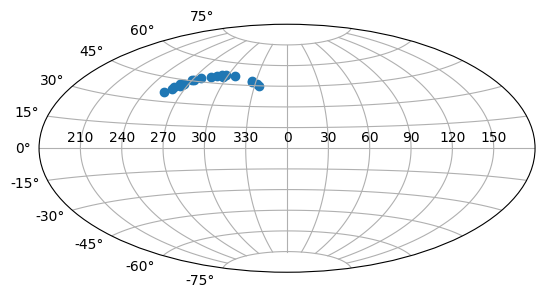

In [14]:
# initial plot with galactic coordiantes on a sky projection

ax = plt.subplot(111, projection='aitoff')
tick_labels = np.array([210,240,270,300,330,0,30,60,90,120,150])
ax.set_xticklabels(tick_labels)
ax.grid(True)
plt.scatter(gal_coords.l.wrap_at('180d').radian, gal_coords.b.radian)

In [15]:
# initializing region location variables to fill in for plotting
edges = np.linspace(-80, 80, 10, endpoint=True)
values = [0,0,0,0,0,0,0,0,0,0,]
bottoms = 170

# I do not really understand these nor do I understand fill_between but I couldn't figure out what else to use

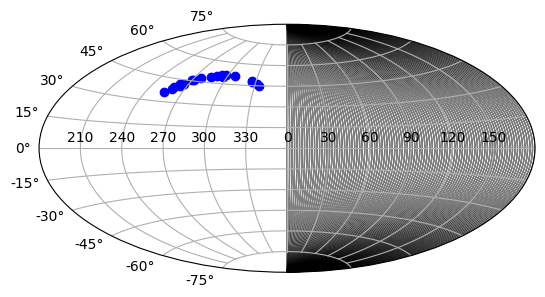

In [17]:
# attempt at filling in the eROSITA region with the clusters projected on top

ax = plt.subplot(111, projection='aitoff')
tick_labels = np.array([210,240,270,300,330,0,30,60,90,120,150])
ax.set_xticklabels(tick_labels)
ax.grid(True)

theta_region = np.linspace(0, np.pi, 100)
phi_region = np.linspace(-np.pi/2, np.pi/2, 50)
theta_region, phi_region = np.meshgrid(theta_region, phi_region)
z_region = np.sin(phi_region)

# Fill the region with a color
ax.fill(theta_region, phi_region, color='black', alpha=0.5)

plt.scatter(gal_coords.l.wrap_at('180d').radian, gal_coords.b.radian,color='b')
plt.show()